<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-4'

In [4]:
os.listdir(base_path)

['data_add_delta_-4_n20.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.113242,30.045881,86.170621,-5.664275e-07,190.329743,190.329743,-3.573599e-07
1,0.0,1.0,20.102230,58.303946,66.207349,8.117152e-08,154.613525,154.613525,9.087870e-08
2,0.0,2.0,95.947493,96.334535,86.888081,9.011494e-09,289.170109,289.170109,2.085987e-07
3,0.0,3.0,92.057114,33.547499,82.548193,5.530986e-07,218.152806,218.152805,7.826484e-07
4,0.0,4.0,38.962085,98.677083,64.171552,2.671443e-09,211.810720,211.810720,-7.255807e-09
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.685534,65.768255,75.636813,3.348929e-08,240.090602,240.090602,1.265597e-07
29996,999.0,26.0,57.970308,85.431708,72.727794,-1.181440e-09,226.129809,226.129810,-1.301862e-07
29997,999.0,27.0,35.252923,67.000629,78.135659,-3.587318e-08,190.389211,190.389211,-7.556304e-08
29998,999.0,28.0,43.963405,70.089681,99.451540,5.431918e-08,223.504626,223.504626,-7.152394e-08


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.113242,30.045881,86.170621,-5.664275e-07,190.329743,190.329743,-3.573599e-07
1,0.0,1.0,20.102230,58.303946,66.207349,8.117152e-08,154.613525,154.613525,9.087870e-08
2,0.0,2.0,95.947493,96.334535,86.888081,9.011494e-09,289.170109,289.170109,2.085987e-07
3,0.0,3.0,92.057114,33.547499,82.548193,5.530986e-07,218.152806,218.152805,7.826484e-07
4,0.0,4.0,38.962085,98.677083,64.171552,2.671443e-09,211.810720,211.810720,-7.255807e-09
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.685534,65.768255,75.636813,3.348929e-08,240.090602,240.090602,1.265597e-07
29996,999.0,26.0,57.970308,85.431708,72.727794,-1.181440e-09,226.129809,226.129810,-1.301862e-07
29997,999.0,27.0,35.252923,67.000629,78.135659,-3.587318e-08,190.389211,190.389211,-7.556304e-08
29998,999.0,28.0,43.963405,70.089681,99.451540,5.431918e-08,223.504626,223.504626,-7.152394e-08


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    64.113242  30.045881  ...  190.329743 -3.573599e-07
      1.0    20.102230  58.303946  ...  154.613525  9.087870e-08
      2.0    95.947493  96.334535  ...  289.170109  2.085987e-07
      3.0    92.057114  33.547499  ...  218.152805  7.826484e-07
      4.0    38.962085  98.677083  ...  211.810720 -7.255807e-09
...                ...        ...  ...         ...           ...
999.0 25.0   88.685534  65.768255  ...  240.090602  1.265597e-07
      26.0   57.970308  85.431708  ...  226.129810 -1.301862e-07
      27.0   35.252923  67.000629  ...  190.389211 -7.556304e-08
      28.0   43.963405  70.089681  ...  223.504626 -7.152394e-08
      29.0   83.469761  29.740009  ...  219.761759  8.325711e-08

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    64.113242  30.045881  ...  190.329743 -3.573599e-07
      1.0    20.102230  58.303946  ...  154.613525  9.087870e-08
      2.0    95.947493  96.334535  ...  289.170109  2.085987e-07
      3.0    92.057114  33.547499  ...  218.152805  7.826484e-07
      4.0    38.962085  98.677083  ...  211.810720 -7.255807e-09
...                ...        ...  ...         ...           ...
999.0 25.0   88.685534  65.768255  ...  240.090602  1.265597e-07
      26.0   57.970308  85.431708  ...  226.129810 -1.301862e-07
      27.0   35.252923  67.000629  ...  190.389211 -7.556304e-08
      28.0   43.963405  70.089681  ...  223.504626 -7.152394e-08
      29.0   83.469761  29.740009  ...  219.761759  8.325711e-08

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.113242,30.045881,86.170621,-5.664275e-07,190.329743,190.329743,-3.573599e-07
1,0.0,1.0,20.102230,58.303946,66.207349,8.117152e-08,154.613525,154.613525,9.087870e-08
2,0.0,2.0,95.947493,96.334535,86.888081,9.011494e-09,289.170109,289.170109,2.085987e-07
3,0.0,3.0,92.057114,33.547499,82.548193,5.530986e-07,218.152806,218.152805,7.826484e-07
4,0.0,4.0,38.962085,98.677083,64.171552,2.671443e-09,211.810720,211.810720,-7.255807e-09
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.685534,65.768255,75.636813,3.348929e-08,240.090602,240.090602,1.265597e-07
29996,999.0,26.0,57.970308,85.431708,72.727794,-1.181440e-09,226.129809,226.129810,-1.301862e-07
29997,999.0,27.0,35.252923,67.000629,78.135659,-3.587318e-08,190.389211,190.389211,-7.556304e-08
29998,999.0,28.0,43.963405,70.089681,99.451540,5.431918e-08,223.504626,223.504626,-7.152394e-08


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    64.113242  30.045881  ...  190.329743 -3.573599e-07
      1.0    20.102230  58.303946  ...  154.613525  9.087870e-08
      2.0    95.947493  96.334535  ...  289.170109  2.085987e-07
      3.0    92.057114  33.547499  ...  218.152805  7.826484e-07
      4.0    38.962085  98.677083  ...  211.810720 -7.255807e-09
...                ...        ...  ...         ...           ...
999.0 25.0   88.685534  65.768255  ...  240.090602  1.265597e-07
      26.0   57.970308  85.431708  ...  226.129810 -1.301862e-07
      27.0   35.252923  67.000629  ...  190.389211 -7.556304e-08
      28.0   43.963405  70.089681  ...  223.504626 -7.152394e-08
      29.0   83.469761  29.740009  ...  219.761759  8.325711e-08

[30000 rows x 7 columns]

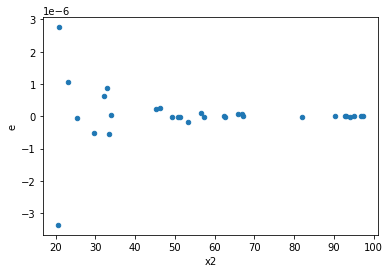

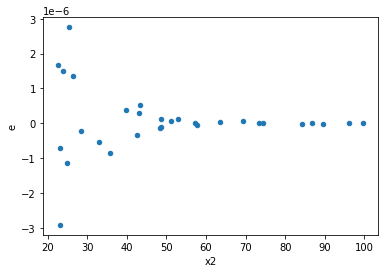

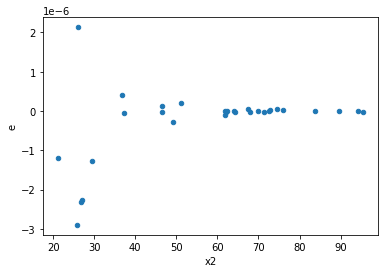

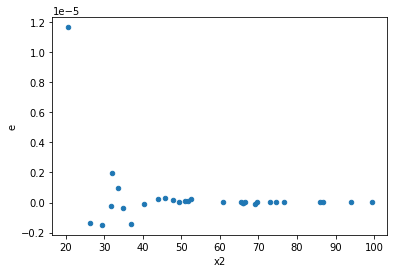

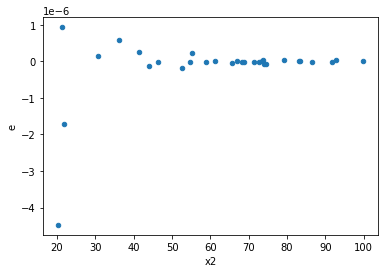

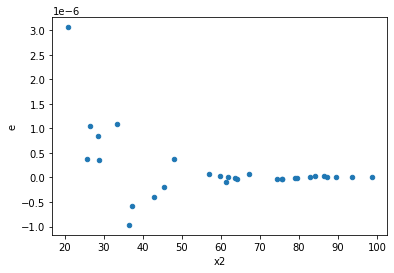

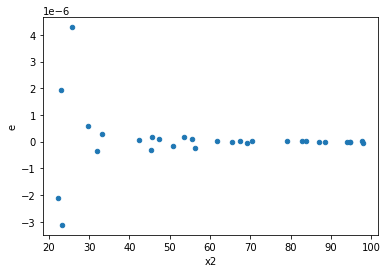

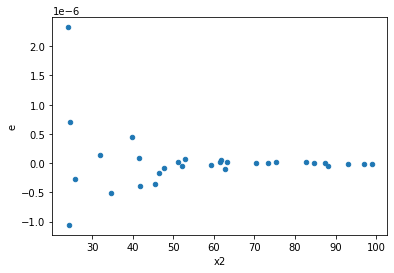

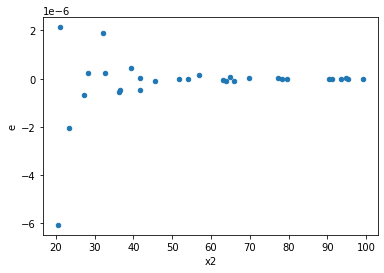

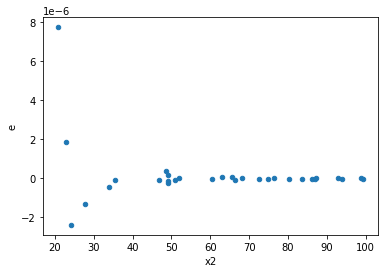

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,1.56733582549204e-15,4.212403789300393e-12,1.95916978186505e-16,5.265504736625491e-13,0.00037207634972533045,4.883195862185435e-14,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,5.232474595192211e-15,7.438877680004531e-12,6.540593243990264e-16,9.298597100005664e-13,0.0007033957029911834,8.554598219080518e-13,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,2.1305172276473985e-15,7.917980747488808e-12,2.663146534559248e-16,9.89747593436101e-13,0.000269073302347078,1.1365979646941458e-14,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,9.815945735813399e-15,7.190069365588971e-12,1.2269932169766749e-15,8.987586706986214e-13,0.0013652087673578837,1.6829943512664127e-11,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,9.267277903485196e-15,2.0052715935670198e-11,1.1584097379356495e-15,2.5065894919587748e-12,0.0004621457728327146,1.2944264273003997e-13,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,8.53691666136241e-15,6.704339699680297e-12,1.0671145826703013e-15,8.380424624600371e-13,0.0012733419014805442,1.2309285669023266e-11,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,1.848215278586329e-15,2.6518489469549323e-11,2.310269098232911e-16,3.3148111836936654e-12,6.96953452310547e-05,2.6076158075855674e-17,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,5.7056870341067945e-15,2.050614302864614e-11,7.132108792633493e-16,2.5632678785807674e-12,0.000278242818561063,1.3215014895242113e-14,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,6.2390272246938e-15,3.8358967171940084e-12,7.79878403086725e-16,4.794870896492511e-13,0.0016264846748161935,3.693835517757009e-11,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64